<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
# Vokaturi.py
# Copyright (C) 2016 Paul Boersma, Johnny Ip, Toni Gojani
# version 2018-07-27

# This file is the Python interface to the Vokaturi library.
# The declarations are parallel to those in Vokaturi.h.

import ctypes

class Quality(ctypes.Structure):
	_fields_ = [
		("valid",                ctypes.c_int),
		("num_frames_analyzed",  ctypes.c_int),
		("num_frames_lost",      ctypes.c_int)]

class EmotionProbabilities(ctypes.Structure):
	_fields_ = [
		("neutrality",  ctypes.c_double),
		("happiness",   ctypes.c_double),
		("sadness",     ctypes.c_double),
		("anger",       ctypes.c_double),
		("fear",        ctypes.c_double)]

_library = None

def load(path_to_Vokaturi_library):
	global _library

	_library = ctypes.CDLL(path_to_Vokaturi_library)

	_library.VokaturiVoice_create.restype = ctypes.c_void_p
	_library.VokaturiVoice_create.argtypes = [
		ctypes.c_double,                           # sample_rate
		ctypes.c_int]                              # buffer_length

	_library.VokaturiVoice_setRelativePriorProbabilities.restype = None
	_library.VokaturiVoice_setRelativePriorProbabilities.argtypes = [
		ctypes.c_void_p,                           # voice
		ctypes.POINTER (EmotionProbabilities)]     # priorEmotionProbabilities

	_library.VokaturiVoice_fill.restype = None     # deprecated
	_library.VokaturiVoice_fill.argtypes = [
		ctypes.c_void_p,                           # voice
		ctypes.c_int,                              # num_samples
		ctypes.POINTER (ctypes.c_double)]          # samples

	_library.VokaturiVoice_fill_float64array.restype = None
	_library.VokaturiVoice_fill_float64array.argtypes = [
		ctypes.c_void_p,                           # voice
		ctypes.c_int,                              # num_samples
		ctypes.POINTER (ctypes.c_double)]          # samples

	_library.VokaturiVoice_fill_float32array.restype = None
	_library.VokaturiVoice_fill_float32array.argtypes = [
		ctypes.c_void_p,                           # voice
		ctypes.c_int,                              # num_samples
		ctypes.POINTER (ctypes.c_float)]           # samples

	_library.VokaturiVoice_fill_int32array.restype = None
	_library.VokaturiVoice_fill_int32array.argtypes = [
		ctypes.c_void_p,                           # voice
		ctypes.c_int,                              # num_samples
		ctypes.POINTER (ctypes.c_int)]             # samples

	_library.VokaturiVoice_fill_int16array.restype = None
	_library.VokaturiVoice_fill_int16array.argtypes = [
		ctypes.c_void_p,                           # voice
		ctypes.c_int,                              # num_samples
		ctypes.POINTER (ctypes.c_short)]           # samples

	_library.VokaturiVoice_fill_float64value.restype = None
	_library.VokaturiVoice_fill_float64value.argtypes = [
		ctypes.c_void_p,                           # voice
		ctypes.c_double]                           # sample

	_library.VokaturiVoice_fill_float32value.restype = None
	_library.VokaturiVoice_fill_float32value.argtypes = [
		ctypes.c_void_p,                           # voice
		ctypes.c_float]                            # sample

	_library.VokaturiVoice_fill_int32value.restype = None
	_library.VokaturiVoice_fill_int32value.argtypes = [
		ctypes.c_void_p,                           # voice
		ctypes.c_int]                              # sample

	_library.VokaturiVoice_fill_int16value.restype = None
	_library.VokaturiVoice_fill_int16value.argtypes = [
		ctypes.c_void_p,                           # voice
		ctypes.c_int]                              # sample (yes, 32 bits, because of C argument sizes)

	_library.VokaturiVoice_fillInterlacedStereo_float64array.restype = None
	_library.VokaturiVoice_fillInterlacedStereo_float64array.argtypes = [
		ctypes.c_void_p,                           # voice left-channel
		ctypes.c_void_p,                           # voice right-channel
		ctypes.c_int,                              # num_samples_per_channel
		ctypes.POINTER (ctypes.c_double)]          # samples

	_library.VokaturiVoice_fillInterlacedStereo_float32array.restype = None
	_library.VokaturiVoice_fillInterlacedStereo_float32array.argtypes = [
		ctypes.c_void_p,                           # voice left-channel
		ctypes.c_void_p,                           # voice right-channel
		ctypes.c_int,                              # num_samples_per_channel
		ctypes.POINTER (ctypes.c_float)]           # samples

	_library.VokaturiVoice_fillInterlacedStereo_int32array.restype = None
	_library.VokaturiVoice_fillInterlacedStereo_int32array.argtypes = [
		ctypes.c_void_p,                           # voice left-channel
		ctypes.c_void_p,                           # voice right-channel
		ctypes.c_int,                              # num_samples_per_channel
		ctypes.POINTER (ctypes.c_int)]             # samples

	_library.VokaturiVoice_fillInterlacedStereo_int16array.restype = None
	_library.VokaturiVoice_fillInterlacedStereo_int16array.argtypes = [
		ctypes.c_void_p,                           # voice left-channel
		ctypes.c_void_p,                           # voice right-channel
		ctypes.c_int,                              # num_samples_per_channel
		ctypes.POINTER (ctypes.c_short)]           # samples

	_library.VokaturiVoice_extract.restype = None
	_library.VokaturiVoice_extract.argtypes = [
		ctypes.c_void_p,                           # voice
		ctypes.POINTER (Quality),                  # quality
		ctypes.POINTER (EmotionProbabilities)]     # emotionProbabilities

	_library.VokaturiVoice_reset.restype = None
	_library.VokaturiVoice_reset.argtypes = [
		ctypes.c_void_p]                           # voice

	_library.VokaturiVoice_destroy.restype = None
	_library.VokaturiVoice_destroy.argtypes = [
		ctypes.c_void_p]                           # voice

	_library.Vokaturi_versionAndLicense.restype = ctypes.c_char_p
	_library.Vokaturi_versionAndLicense.argtypes = []

class Voice:

	def __init__(self, sample_rate, buffer_length):
		self._voice = _library.VokaturiVoice_create(sample_rate, buffer_length)

	def setRelativePriorProbabilities(self, priorEmotionProbabilities):
		_library.VokaturiVoice_setRelativePriorProbabilities(self._voice, priorEmotionProbabilities)

	def fill(self, num_samples, samples): # deprecated
		_library.VokaturiVoice_fill(self._voice, num_samples, samples)

	def fill_float64array(self, num_samples, samples):
		_library.VokaturiVoice_fill_float64array(self._voice, num_samples, samples)

	def fill_float32array(self, num_samples, samples):
		_library.VokaturiVoice_fill_float32array(self._voice, num_samples, samples)

	def fill_int32array(self, num_samples, samples):
		_library.VokaturiVoice_fill_int32array(self._voice, num_samples, samples)

	def fill_int16array(self, num_samples, samples):
		_library.VokaturiVoice_fill_int16array(self._voice, num_samples, samples)

	def fill_float64value(self, sample):
		_library.VokaturiVoice_fill_float64value(self._voice, sample)

	def fill_float32value(self, sample):
		_library.VokaturiVoice_fill_float32value(self._voice, sample)

	def fill_int32value(self, sample):
		_library.VokaturiVoice_fill_int32value(self._voice, sample)

	def fill_int16value(self, sample):
		_library.VokaturiVoice_fill_int16value(self._voice, sample)

	def extract(self, quality, emotionProbabilities):
		_library.VokaturiVoice_extract(self._voice, quality, emotionProbabilities)

	def reset(self):
		_library.VokaturiVoice_reset(self._voice)

	def destroy(self):
		if not _library is None:
			_library.VokaturiVoice_destroy(self._voice)

def Voices_fillInterlacedStereo_float64array(left, right, num_samples_per_channel, samples):
	_library.VokaturiVoice_fillInterlacedStereo_float64array(left._voice, right._voice, num_samples_per_channel, samples)

def Voices_fillInterlacedStereo_float32array(left, right, num_samples_per_channel, samples):
	_library.VokaturiVoice_fillInterlacedStereo_float32array(left._voice, right._voice, num_samples_per_channel, samples)

def Voices_fillInterlacedStereo_int32array(left, right, num_samples_per_channel, samples):
	_library.VokaturiVoice_fillInterlacedStereo_int32array(left._voice, right._voice, num_samples_per_channel, samples)

def Voices_fillInterlacedStereo_int16array(left, right, num_samples_per_channel, samples):
	_library.VokaturiVoice_fillInterlacedStereo_int16array(left._voice, right._voice, num_samples_per_channel, samples)

def versionAndLicense():
	return _library.Vokaturi_versionAndLicense().decode("UTF-8")

def SampleArrayC(size): # deprecated
	return (ctypes.c_double * size)()

def SampleArrayCdouble(size):
	return (ctypes.c_double * size)()

def SampleArrayCfloat(size):
	return (ctypes.c_float * size)()

def SampleArrayCint(size):
	return (ctypes.c_int * size)()

def SampleArrayCshort(size):
	return (ctypes.c_short * size)()


In [2]:
# OpenVokaWavMean-win64.py
# public-domain sample code by Vokaturi, 2019-05-31
#
# A sample script that uses the VokaturiPlus library to extract the emotions from
# a wav file on disk. The file has to contain a mono recording.
#
# Call syntax:
#   python3 OpenVokaWavMean-win64.py path_to_sound_file.wav
#
# For the sound file hello.wav that comes with OpenVokaturi, the result should be:
#	Neutral: 0.760
#	Happy: 0.000
#	Sad: 0.238
#	Angry: 0.001
#	Fear: 0.000

import sys
import scipy.io.wavfile

# for Windows
# sys.path.append("C:/Users/USER/PycharmProjects/TensorFlow/voctari")

# for MAC
sys.path.append("/Users/alex/Documents/ai/business_model/voicemagic/OpenVokaturi/api/")

import Vokaturi

print ("Loading library...")
# for Windwos
# Vokaturi.load("C:/Users/USER/PycharmProjects/TensorFlow/voctari/lib/open/win/OpenVokaturi-3-3-win64.dll")
# for MAC
Vokaturi.load("/Users/alex/Documents/ai/business_model/voicemagic/OpenVokaturi/lib/open/macos/OpenVokaturi-3-3-mac64.dylib")

print ("Analyzed by: %s" % Vokaturi.versionAndLicense())

Loading library...
Analyzed by: OpenVokaturi version 3.3 for open-source projects, 2019-05-30
Distributed under the GNU General Public License, version 3 or later


In [3]:
print(sys.argv)

['/Users/alex/Documents/ai/business_model/voicemagic/env/lib/python3.7/site-packages/ipykernel_launcher.py', '-f', '/Users/alex/Library/Jupyter/runtime/kernel-cf8aaec0-a86e-4d46-aff1-6e953bed50b6.json']


In [27]:
print ("Reading sound file...")
# file_name = "./audio_file/Google_Gnome.wav"   # Neutral
# file_name = "./audio_file/commercial_mono.wav"    # Angry
# file_name = "./audio_file/multi.wav"    # Neutral
# file_name = "./audio_file/economy_4_16000.wav"    # Neutral
# file_name = "./audio_file/bong_interview_YTN_16000.wav"    # Happy
file_name = "./audio_file/witch_hunt_2_online-audio-converter.com_16000.wav"    # Anger

(sample_rate, samples) = scipy.io.wavfile.read(file_name)
print ("   sample rate %.3f Hz" % sample_rate)

print ("Allocating Vokaturi sample array...")
buffer_length = len(samples)
print ("   %d samples, %d channels" % (buffer_length, samples.ndim))
c_buffer = Vokaturi.SampleArrayC(buffer_length)
if samples.ndim == 1:  # mono
	c_buffer[:] = samples[:] / 32768.0
else:  # stereo
	c_buffer[:] = 0.5*(samples[:,0]+0.0+samples[:,1]) / 32768.0

print ("Creating VokaturiVoice...")
voice = Vokaturi.Voice (sample_rate, buffer_length)

print ("Filling VokaturiVoice with samples...")
voice.fill(buffer_length, c_buffer)

print ("Extracting emotions from VokaturiVoice...")
quality = Vokaturi.Quality()
emotionProbabilities = Vokaturi.EmotionProbabilities()
voice.extract(quality, emotionProbabilities)

if quality.valid:
	print ("Neutral: %.3f" % emotionProbabilities.neutrality)
	print ("Happy: %.3f" % emotionProbabilities.happiness)
	print ("Sad: %.3f" % emotionProbabilities.sadness)
	print ("Angry: %.3f" % emotionProbabilities.anger)
	print ("Fear: %.3f" % emotionProbabilities.fear)
else:
	print ("Not enough sonorancy to determine emotions")

voice.destroy()

Reading sound file...
   sample rate 16000.000 Hz
Allocating Vokaturi sample array...
   12736470 samples, 1 channels
Creating VokaturiVoice...
Filling VokaturiVoice with samples...
Extracting emotions from VokaturiVoice...
Neutral: 0.036
Happy: 0.215
Sad: 0.027
Angry: 0.672
Fear: 0.050


In [28]:
import matplotlib.pyplot as plt

In [29]:
emotion_labels = ["anger", "fear", "happiness", "neutrality", "sadness"]
emotions = [emotionProbabilities.anger, emotionProbabilities.fear, emotionProbabilities.happiness, emotionProbabilities.neutrality, emotionProbabilities.sadness]

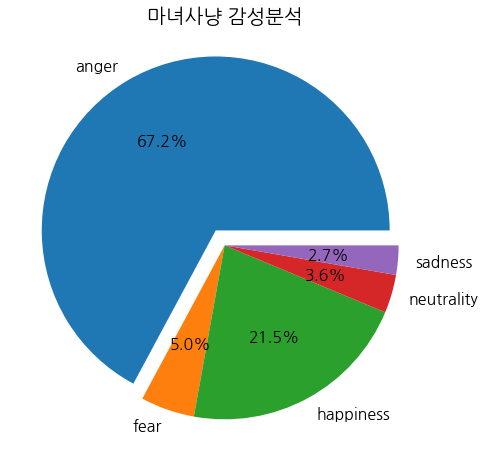

In [37]:
plt.figure(figsize=(8,8))
plt.pie(emotions, labels=emotion_labels, autopct='%1.1f%%', explode=(0.1,0,0,0,0), textprops={'fontsize':16})
plt.title("마녀사냥 감성분석", fontsize=20)
plt.show()